In [ ]:
#importing liblaries
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB


DATA UNDERSTANDING

In [ ]:
file_path = "C:\\Users\\HP\\Desktop\\terry dtops data\\Terry_Stops_20240301.csv"
df = pd.read_csv(file_path)

df

In [ ]:
df.head()

In [ ]:
df.dtypes

In [ ]:
df.columns

In [ ]:
# Iterating over columns to identify categorical variables
for column in df.columns:
    if df[column].dtype == 'object':
        unique_values = df[column].unique()
        print(f"Unique values for {column}: {unique_values}")

In [ ]:
df.describe()

In [ ]:
#checking for null values
missing_values = df.isnull().sum()
missing_values

In [ ]:
# Checking for NaN values in the DataFrame
nan_values = df.isna().sum()

# Display columns with NaN values and their respective counts
print("Columns with NaN values:")
print(nan_values[nan_values > 0])


### Feature engineering 

In [ ]:

# Creating a new feature indicating whether a weapon was involved in the stop
df['Weapon Involved'] = df['Weapon Type'].notnull().astype(int)


# Creating a new feature representing the geographical area of the stop by combining "Precinct", "Sector", and "Beat"
df['Geographical Area'] = df['Precinct'] + '-' + df['Sector'] + '-' + df['Beat']

print(df.head())


In [ ]:
df.head()

In [ ]:

#interaction terms between officers race and call type
df['Race_CallType'] = df['Officer Race'] + '_' + df['Call Type']

print(df.head())


In [ ]:
df.head()

### Data Analysis and exploration

Getting the relevant collumns for my analysis

In [ ]:

selected_columns = ['Officer Race', 'Subject Perceived Race', 'Stop Resolution', 'Geographical Area','Weapon Involved']
race_relationship_data = df[selected_columns]

race_relationship_data.head()

In [43]:
race_relationship_data.dtypes

Officer Race              object
Subject Perceived Race    object
Stop Resolution           object
Geographical Area         object
Weapon Involved            int32
dtype: object

### Race composition for officers and subject involved

In [ ]:
race_counts = race_relationship_data['Officer Race'].value_counts()

# Plotting the race composition
plt.figure(figsize=(8, 6))
sns.barplot(x=race_counts.index, y=race_counts.values, palette='viridis')
plt.title('Race Composition of Officers')
plt.xlabel('Officer Race')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()


In [ ]:
# Plotting the distribution of subject perceived race with rotated labels
plt.figure(figsize=(10, 6))
sns.countplot(x='Subject Perceived Race', data=race_relationship_data, palette='viridis')
plt.title('Distribution of Subject Perceived Race')
plt.xlabel('Subject Perceived Race')
plt.ylabel('Count')
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()

### Relationship between office and subject by race

In [ ]:

# i'm Creating a pivot table to count occurrences of each combination of races
pivot_table = race_relationship_data.pivot_table(index='Officer Race', columns='Subject Perceived Race', aggfunc='size', fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='viridis')
plt.title('Relationship between Officer Race and Subject Perceived Race')
plt.xlabel('Subject Perceived Race')
plt.ylabel('Officer Race')
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0, va='center')  
plt.tight_layout()  
plt.show()

## Hypothesis Testing: Relationship Between Officer's Race and Stop Resolution

### Hypotheses:
- **Null Hypothesis (H0):** There is no association between the officer's race and the stop resolution.
- **Alternative Hypothesis (H1):** There is an association between the officer's race and the stop resolution.

### Finding:
Based on the small p-value obtained from the chi-square test (much smaller than the significance level of 0.05), we reject the null hypothesis in favor of the alternative hypothesis, indicating that there is indeed a significant association between the officer's race and the stop resolution.
This analysis suggests that the type of stop resolution is not independent of the officer's race, indicating potential biases or underlying factors influencing the stop resolution based on the officer's race.

In [ ]:
from scipy.stats import chi2_contingency

# Creating a contingency table
contingency_table = pd.crosstab(race_relationship_data['Officer Race'], race_relationship_data['Stop Resolution'])

print("Contingency Table:")
print(contingency_table)

# Calculating chi-square statistic and p-value
chi2, p, _, _ = chi2_contingency(contingency_table)
print("\nChi-square Statistic:", chi2)
print("P-value:", p)

contingency table visualization

In [ ]:

# Define the contingency table
contingency_table = [[79, 0, 148, 113, 5],
                     [667, 8, 1368, 666, 28],
                     [494, 10, 1240, 610, 23],
                     [927, 19, 2212, 644, 33],
                     [111, 2, 239, 175, 5],
                     [629, 16, 1278, 755, 33],
                     [998, 18, 2039, 843, 37],
                     [21, 1, 69, 9, 0],
                     [10519, 140, 20695, 10678, 562]]

# Defining officer races and stop resolutions
officer_races = ['American Indian/Alaska Native', 'Asian', 'Black or African American', 
                 'Hispanic or Latino', 'Nat Hawaiian/Oth Pac Islander', 'Not Specified', 
                 'Two or More Races', 'Unknown', 'White']
stop_resolutions = ['Arrest', 'Citation / Infraction', 'Field Contact', 
                    'Offense Report', 'Referred for Prosecution']

# Creating a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d',
            xticklabels=stop_resolutions, yticklabels=officer_races, cbar=True)
plt.title('Contingency Table: Officer Race vs Stop Resolution')
plt.xlabel('Stop Resolution')
plt.ylabel('Officer Race')
plt.show()


### Stop resolutions in randomly selected areas

In [ ]:
# Select random areas
random_areas = df['Geographical Area'].sample(n=11, random_state=42)  # Change n to the number of random areas you want

# Filter DataFrame to include only randomly selected areas
df_random_areas = df[df['Geographical Area'].isin(random_areas)]

# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(data=df_random_areas, x='Geographical Area', hue='Stop Resolution')
plt.title('Stop Resolutions in Randomly Selected Geographical Areas')
plt.xlabel('Geographical Area')
plt.ylabel('Count')
plt.legend(title='Stop Resolution')
plt.xticks(rotation=45, ha='right')
plt.show()

### stop resolutions with weapons involvement

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Stop Resolution', hue='Weapon Involved')
plt.title('Stop Resolutions with Weapon Involvement')
plt.xlabel('Stop Resolution')
plt.ylabel('Count')
plt.legend(title='Weapon Involved', labels=['No', 'Yes'])
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
contingency_table = pd.crosstab(race_relationship_data['Stop Resolution'], [race_relationship_data['Officer Race'], race_relationship_data['Subject Perceived Race'], race_relationship_data['Geographical Area']])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display results
print("Contingency Table:")
print(contingency_table)
print("\nChi-square Statistic:", chi2)
print("P-value:", p)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# contingency table data
contingency_table = {
    'Stop Resolution': ['Arrest', 'Citation / Infraction', 'Field Contact', 'Offense Report', 'Referred for Prosecution'],
    'American Indian/Alaska Native': [79, 0, 148, 113, 5],
    'Asian': [667, 8, 1368, 666, 28],
    'Black or African American': [494, 10, 1240, 610, 23],
    'Hispanic or Latino': [927, 19, 2212, 644, 33],
    'Nat Hawaiian/Oth Pac Islander': [111, 2, 239, 175, 5],
    'Not Specified': [629, 16, 1278, 755, 33],
    'Two or More Races': [998, 18, 2039, 843, 37],
    'Unknown': [21, 1, 69, 9, 0],
    'White': [10519, 140, 20695, 10678, 562]
}

# Creating DataFrame
df_contingency = pd.DataFrame(contingency_table)
df_contingency.set_index('Stop Resolution', inplace=True)

# Plotting
plt.figure(figsize=(12, 8))
df_contingency.plot(kind='bar', stacked=True, figsize=(12,8))
plt.title('Stop Resolutions by Officer Race')
plt.xlabel('Stop Resolution')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Officer Race')
plt.show()


### BASELINE MODELLING

In [45]:
# Performing one-hot encoding for categorical variables
categorical_cols = ['Officer Race', 'Subject Perceived Race', 'Geographical Area']
data_encoded = pd.get_dummies(race_relationship_data, columns=categorical_cols, drop_first=True)

# Splitting the data into features and target variable
X = data_encoded.drop('Stop Resolution', axis=1)
y = data_encoded['Stop Resolution']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
y_train

In [ ]:
y_test

### MODELLING AND MODEL EVALUATION

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Instantiating logistic regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

logistic_model.fit(X_train, y_train)

# predictions on the training set
train_preds = logistic_model.predict(X_train)

# predictions on the testing set
test_preds = logistic_model.predict(X_test)

# model evaluation
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# The Classifications report/result
print("\nClassification Report:")
print(classification_report(y_test, test_preds, zero_division=1))



Training Accuracy: 0.6383630524803515
Testing Accuracy: 0.6368936961297955

Classification Report:
                          precision    recall  f1-score   support

                  Arrest       0.41      0.01      0.02      2885
   Citation / Infraction       1.00      0.00      0.00        50
           Field Contact       0.72      0.88      0.79      5854
          Offense Report       0.51      0.82      0.63      2896
Referred for Prosecution       1.00      0.00      0.00       149

                accuracy                           0.64     11834
               macro avg       0.73      0.34      0.29     11834
            weighted avg       0.60      0.64      0.55     11834



In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# model dicts.
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
}

for name, model in models.items():
    # Training the model
    model.fit(X_train, y_train)
    
    # Predictions on the test set
    test_preds = model.predict(X_test)
    
    # model evaluation
    test_accuracy = accuracy_score(y_test, test_preds)
    
    # Classification report
    report = classification_report(y_test, test_preds)
    
    print(f"Model: {name}")
    print(f"Testing Accuracy: {test_accuracy}")
    print("Classification Report:")
    print(report)
    print()


Model: Decision Tree
Testing Accuracy: 0.6222748014196383
Classification Report:
                          precision    recall  f1-score   support

                  Arrest       0.37      0.16      0.23      2885
   Citation / Infraction       0.00      0.00      0.00        50
           Field Contact       0.72      0.84      0.77      5854
          Offense Report       0.53      0.68      0.60      2896
Referred for Prosecution       0.25      0.01      0.01       149

                accuracy                           0.62     11834
               macro avg       0.37      0.34      0.32     11834
            weighted avg       0.58      0.62      0.59     11834


Model: Random Forest
Testing Accuracy: 0.624049349332432
Classification Report:
                          precision    recall  f1-score   support

                  Arrest       0.37      0.14      0.20      2885
   Citation / Infraction       0.00      0.00      0.00        50
           Field Contact       0.72      0

c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_class

Model: AdaBoost
Testing Accuracy: 0.6095149569038364
Classification Report:
                          precision    recall  f1-score   support

                  Arrest       0.38      0.00      0.00      2885
   Citation / Infraction       0.00      0.00      0.00        50
           Field Contact       0.66      0.90      0.76      5854
          Offense Report       0.51      0.67      0.58      2896
Referred for Prosecution       0.00      0.00      0.00       149

                accuracy                           0.61     11834
               macro avg       0.31      0.31      0.27     11834
            weighted avg       0.54      0.61      0.52     11834




c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model: Gradient Boosting
Testing Accuracy: 0.6085009295250972
Classification Report:
                          precision    recall  f1-score   support

                  Arrest       0.40      0.04      0.07      2885
   Citation / Infraction       0.00      0.00      0.00        50
           Field Contact       0.64      0.91      0.75      5854
          Offense Report       0.54      0.61      0.57      2896
Referred for Prosecution       0.00      0.00      0.00       149

                accuracy                           0.61     11834
               macro avg       0.32      0.31      0.28     11834
            weighted avg       0.55      0.61      0.53     11834


Model: Naive Bayes
Testing Accuracy: 0.012168328544870712
Classification Report:
                          precision    recall  f1-score   support

                  Arrest       0.00      0.00      0.00      2885
   Citation / Infraction       0.00      0.90      0.01        50
           Field Contact       0.79  

### CROSS-VALIDATION
performing cross-validation to ensure that the model performance estimates are robust and not overly optimistic.

Random Forest has the highest mean cross-validation score, indicating better performance on average compared to the other models. Additionally, Random Forest has the lowest standard deviation among the models, suggesting more consistent performance across different folds. Therefore, based on these cross-validation results, Random Forest appears to be the best model among the ones tested.

In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

# models for cross validation
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Performing cross-validation for each model
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"Model: {name}")
    print("Cross-validation scores:", cv_scores)
    print("Mean CV score:", cv_scores.mean())
    print("Standard deviation of CV scores:", cv_scores.std())
    print()

Model: Decision Tree
Cross-validation scores: [0.61381641 0.62121052 0.61831819 0.6206423  0.6206423 ]
Mean CV score: 0.6189259449200153
Standard deviation of CV scores: 0.002741812863843218

Model: Random Forest
Cross-validation scores: [0.6176191  0.62448505 0.62159307 0.62190999 0.62507923]
Mean CV score: 0.6221372891580127
Standard deviation of CV scores: 0.002643062918160272



c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circum

Model: AdaBoost
Cross-validation scores: [0.60589416 0.60705609 0.5970843  0.60162688 0.60638073]
Mean CV score: 0.6036084312223066
Standard deviation of CV scores: 0.0037759071676580717

Model: Gradient Boosting
Cross-validation scores: [0.6099081  0.60726735 0.60616945 0.60542996 0.60891612]
Mean CV score: 0.607538196166246
Standard deviation of CV scores: 0.0016677300405461746



checking for overfitting

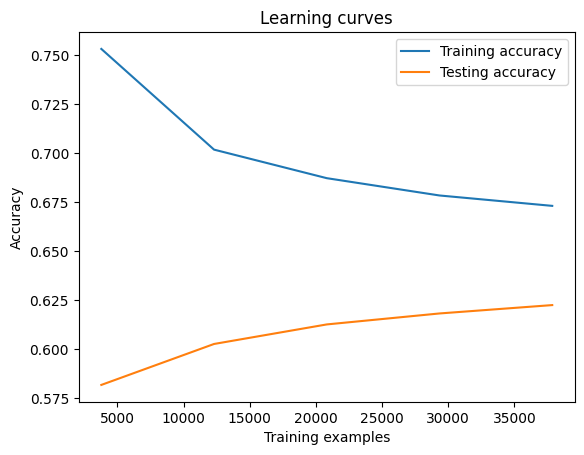

In [55]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), X_train, y_train, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training accuracy')
plt.plot(train_sizes, test_scores_mean, label='Testing accuracy')
plt.xlabel('Training examples')
plt.ylabel('Accuracy')
plt.title('Learning curves')
plt.legend()
plt.show()
